In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('bdas').getOrCreate()
df = spark.read.csv('Datasets/student-mat.csv', header = True , inferSchema = True)
math_class_data = df.toPandas()

In [2]:
from collections import Counter
import pandas as pd
import rm as rm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from pyrsistent import m
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import matplotlib

import sklearn.tree as tree

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [3]:
math_class_data.shape

(395, 33)

In [4]:
math_class_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
math_class_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
math_class_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


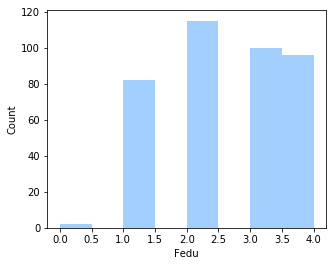

In [7]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Fedu'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Fedu")

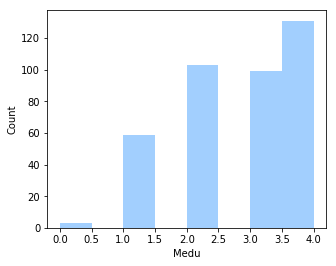

In [8]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Medu'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Medu")

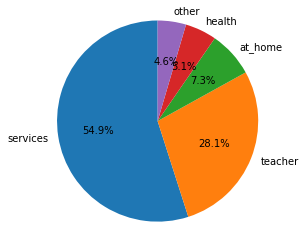

In [9]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['Fjob'].value_counts().tolist(), 
        labels=['services','teacher', 'at_home', 'health','other'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

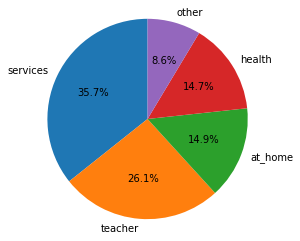

In [10]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['Mjob'].value_counts().tolist(), 
        labels=['services','teacher', 'at_home', 'health','other'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

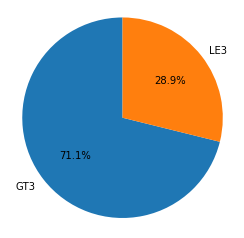

In [11]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['famsize'].value_counts().tolist(), 
        labels=['GT3','LE3'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

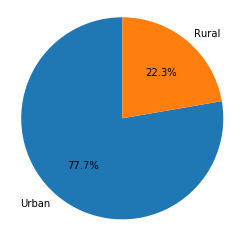

In [12]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['address'].value_counts().tolist(), 
        labels=['Urban','Rural'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

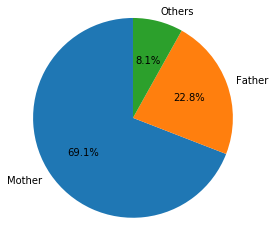

In [13]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['guardian'].value_counts().tolist(), 
        labels=['Mother','Father','Others'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

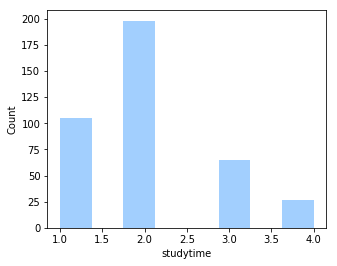

In [14]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['studytime'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="studytime")

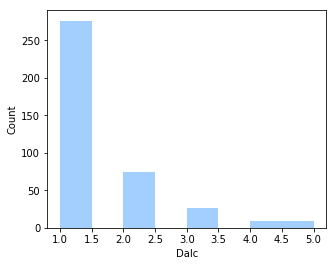

In [15]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Dalc'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Dalc")

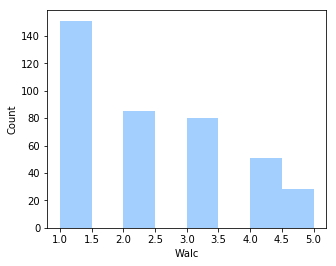

In [16]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Walc'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Walc")

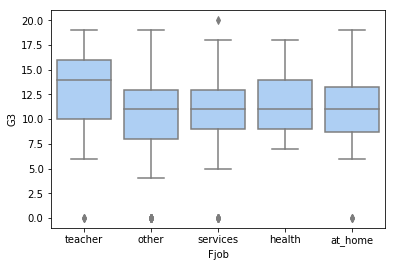

In [17]:
sns.boxplot(x='Fjob',y='G3', data=math_class_data, color='#a2cffe')

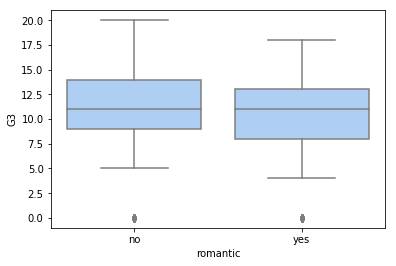

In [18]:
sns.boxplot(x='romantic',y='G3', data=math_class_data, color='#a2cffe')

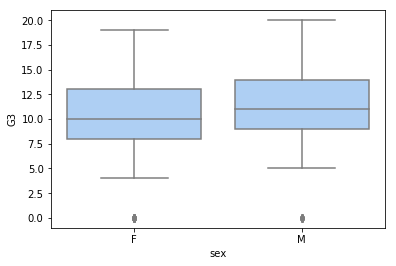

In [19]:
sns.boxplot(x='sex',y='G3', data=math_class_data, color='#a2cffe')

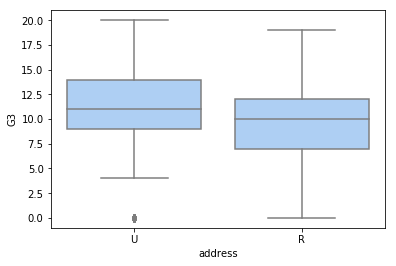

In [20]:
sns.boxplot(x='address',y='G3', data=math_class_data, color='#a2cffe')

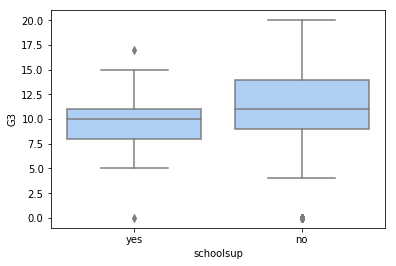

In [21]:
sns.boxplot(x='schoolsup',y='G3', data=math_class_data, color='#a2cffe')

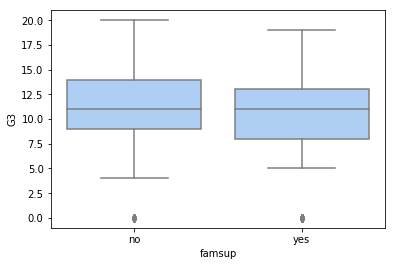

In [22]:
sns.boxplot(x='famsup',y='G3', data=math_class_data, color='#a2cffe')

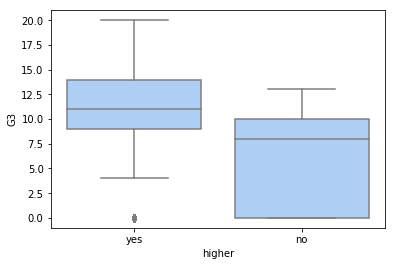

In [23]:
sns.boxplot(x='higher',y='G3', data=math_class_data, color='#a2cffe')

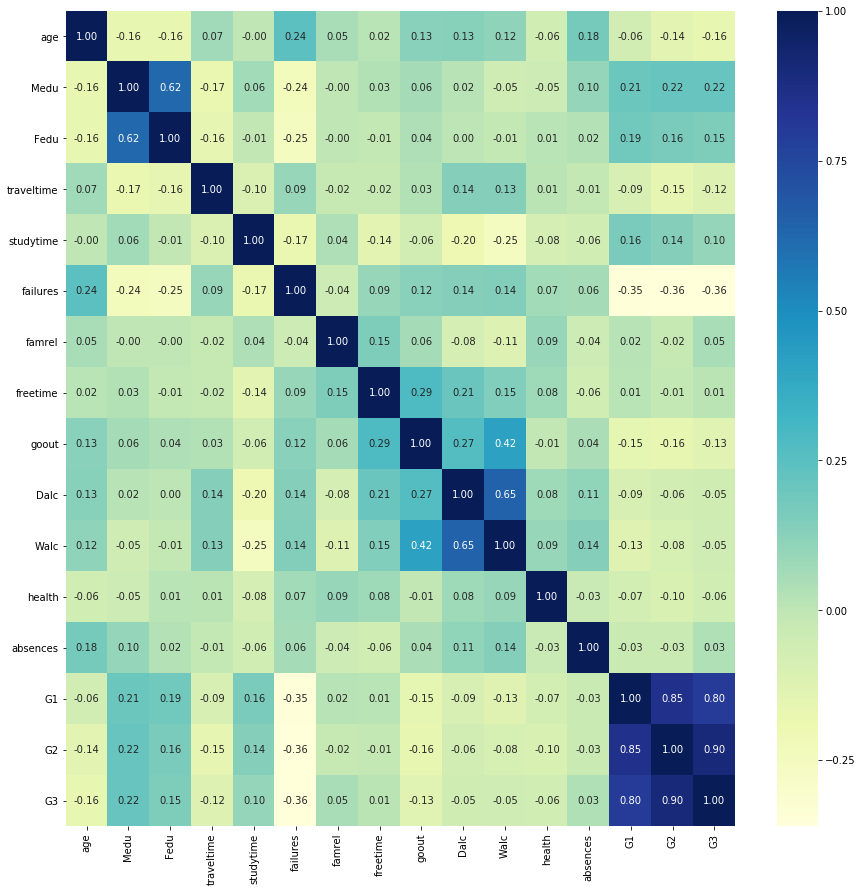

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(math_class_data.corr(),annot = True,fmt = ".2f",cbar = True,cmap = "YlGnBu")

In [25]:
math_class_data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [26]:
math_class_data['final_grade'] = 'na'
math_class_data.loc[(math_class_data.G3 >= 10) & (math_class_data.G3 <= 20), 'final_grade'] = 'high' 
math_class_data.loc[(math_class_data.G3 >= 0) & (math_class_data.G3 <= 10), 'final_grade'] = 'low' 
math_class_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,low
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,high
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,low


In [27]:
math_class_data.drop(['G3'] , axis=1 , inplace=True)

In [28]:
cleanup_nums = {
    "school":{"GP": 0, "MS": 1}, 
    "sex":{"F": 0, "M": 1},
    "address":{"U": 0, "R": 1},
    "famsize":{"LE3": 0, "GT3": 1},
    "Pstatus":{"T": 0, "A": 1},
    "Mjob":{"teacher": 0, "health": 1,"services": 2,"at_home": 3,"other": 4},
    "Fjob":{"teacher": 0, "health": 1,"services": 2,"at_home": 3,"other": 4},
    "reason":{"home": 0, "reputation": 1,"course":2,"other":3},
    "guardian":{"mother": 0, "father": 1,"other":2},
    "schoolsup":{"yes": 0, "no": 1},
    "famsup":{"yes": 0, "no": 1},
    "paid":{"yes": 0, "no": 1},
    "activities":{"yes": 0, "no": 1},
    "nursery":{"yes": 0, "no": 1},
    "higher":{"yes": 0, "no": 1},
    "internet":{"yes": 0, "no": 1},
    "romantic": {"yes": 0, "no": 1},
    "final_grade":{"high":0, "low":1}}

In [29]:
math_class_data.replace(cleanup_nums, inplace=True)
math_class_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,final_grade
0,0,0,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6,5,6,1
1,0,0,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4,5,5,1
2,0,0,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,0
4,0,0,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4,6,10,1


In [30]:
math_class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school         395 non-null int64
sex            395 non-null int64
age            395 non-null int64
address        395 non-null int64
famsize        395 non-null int64
Pstatus        395 non-null int64
Medu           395 non-null int64
Fedu           395 non-null int64
Mjob           395 non-null int64
Fjob           395 non-null int64
reason         395 non-null int64
guardian       395 non-null int64
traveltime     395 non-null int64
studytime      395 non-null int64
failures       395 non-null int64
schoolsup      395 non-null int64
famsup         395 non-null int64
paid           395 non-null int64
activities     395 non-null int64
nursery        395 non-null int64
higher         395 non-null int64
internet       395 non-null int64
romantic       395 non-null int64
famrel         395 non-null int64
freetime       395 non-null int64
goout          395 non-null int64
Dalc       

In [31]:
# y = math_class_data["G3"]
# X = math_class_data.drop(["G3"], axis=1)

# X = pd.get_dummies(X)

# tree = DecisionTreeRegressor()
# tree.fit(X, y)

# importances = tree.feature_importances_
# indices = np.argsort(importances)[::-1]
# for f in range(X.shape[1]):
#     print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [32]:
# from scipy.stats import kstest

# u = math_class_data['G3'].mean()
# std = math_class_data['G3'].std()
# kstest (math_class_data['G3'],'norm',(u,std))

In [33]:
# from sklearn.preprocessing import StandardScaler
# standardScaler = StandardScaler()
# columns_to_scale = ['age', 'G1', 'G2', 'G3']
# math_class_data[columns_to_scale] = standardScaler.fit_transform(math_class_data[columns_to_scale])

# math_class_data.head()

In [34]:
# fig, ax = plt.subplots(figsize=(5, 4))
# sns.distplot(grades_data['G'],  
#              hist_kws={"alpha": 1, "color": "#a2cffe"}, 
#              kde=False, bins=8)
# ax = ax.set(ylabel="Count", xlabel="G")


In [35]:
math_class_data = spark.createDataFrame(math_class_data)

In [36]:
math_class_data.printSchema()


root
 |-- school: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- age: long (nullable = true)
 |-- address: long (nullable = true)
 |-- famsize: long (nullable = true)
 |-- Pstatus: long (nullable = true)
 |-- Medu: long (nullable = true)
 |-- Fedu: long (nullable = true)
 |-- Mjob: long (nullable = true)
 |-- Fjob: long (nullable = true)
 |-- reason: long (nullable = true)
 |-- guardian: long (nullable = true)
 |-- traveltime: long (nullable = true)
 |-- studytime: long (nullable = true)
 |-- failures: long (nullable = true)
 |-- schoolsup: long (nullable = true)
 |-- famsup: long (nullable = true)
 |-- paid: long (nullable = true)
 |-- activities: long (nullable = true)
 |-- nursery: long (nullable = true)
 |-- higher: long (nullable = true)
 |-- internet: long (nullable = true)
 |-- romantic: long (nullable = true)
 |-- famrel: long (nullable = true)
 |-- freetime: long (nullable = true)
 |-- goout: long (nullable = true)
 |-- Dalc: long (nullable = true)
 |-- Walc: lon

In [37]:
math_class_data.head()

Row(school=0, sex=0, age=18, address=0, famsize=1, Pstatus=1, Medu=4, Fedu=4, Mjob=3, Fjob=0, reason=2, guardian=0, traveltime=2, studytime=2, failures=0, schoolsup=0, famsup=1, paid=1, activities=1, nursery=0, higher=0, internet=1, romantic=1, famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=6, G1=5, G2=6, final_grade=1)

In [38]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [39]:
math_class_data.columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'final_grade']

In [40]:
assembler = VectorAssembler(
  inputCols=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian',
             'traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher',
             'internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2'],
    outputCol="features")

In [41]:
output = assembler.transform(math_class_data)

In [42]:
from pyspark.ml.feature import StringIndexer

In [43]:
indexer = StringIndexer(inputCol="final_grade", outputCol="final_gradeIndex")
output_fixed = indexer.fit(output).transform(output)

In [44]:
final_data = output_fixed.select("features",'final_gradeIndex')

In [45]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [46]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [47]:
dtc = DecisionTreeClassifier(labelCol='final_gradeIndex',featuresCol='features')
rfc = RandomForestClassifier(labelCol='final_gradeIndex',featuresCol='features')
gbt = GBTClassifier(labelCol='final_gradeIndex',featuresCol='features')

In [48]:
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

In [49]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [50]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [51]:
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'final_gradeIndex')

In [52]:
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

DTC
0.9797619047619047


In [53]:
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.9821428571428571


In [54]:
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='final_gradeIndex', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

GBT
0.944047619047619


In [55]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [56]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="final_gradeIndex", predictionCol="prediction", metricName="accuracy")

In [57]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [58]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 93.98%
----------------------------------------
A random forest ensemble has an accuracy of: 96.39%
----------------------------------------
An ensemble using GBT has an accuracy of: 93.98%
